In [ ]:
import warnings;warnings.simplefilter('ignore')
#忽略警告
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
#读取iris数据 4特征，3分类 

In [1]:
from sklearn.datasets import load_wine
wine=load_wine()
x=wine.data
y=wine.target
#读取wine数据 13特征，3分类

In [80]:
import warnings;warnings.simplefilter('ignore')
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
x=breast.data
y=breast.target
#读取breast cancer数据 判断肿瘤良性还是恶性 30特征，2分类

In [19]:
from sklearn.datasets import load_boston
boston=load_boston()
x=boston.data
y=boston.target
#读取boston房价数据 进行回归预测 13特征

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=9)
#将数据随机分割成训练集和测试集

# 1.1K近邻

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
# y_pred = knn.predict(x_test)
# y_train_pred =knn.predict(x_train)
print("train score:"+str(knn.score(x_train,y_train)))
print("test score:"+str(knn.score(x_test, y_test)))
#KNN近邻为K时进行分类
#随着邻居个数越来越多，决策边界也越来越平滑
#这一算法对于有很多特征的数据集，尤其是大多数取值都为0的数据集（稀疏数据集）来说效果不好

train score:0.9501466275659824
test score:0.9166666666666666


In [13]:
import numpy as np
scores=[]
for k in np.arange(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test,y_test))
print(scores)
#寻找最优K

[0.8991228070175439, 0.8991228070175439, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9166666666666666, 0.9078947368421053, 0.9122807017543859, 0.9078947368421053, 0.9166666666666666]


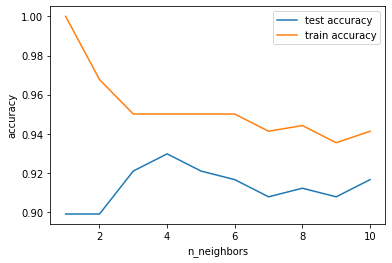

In [16]:
train_scores=[]
for k in np.arange(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
import matplotlib.pyplot as plt
plt.plot(np.arange(1,11),scores,label='test accuracy')
plt.plot(np.arange(1,11),train_scores,label='train accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

一般来说knn分类器有两个重要的参数：邻居个数和数据点之间距离的度量方法。使用较小的邻居个数，往往可以得到比较好的效果，度量距离（metric）默认使用欧式距离，在许多情况下往往效果比较好。对数据进行预处理很重要，这一算法对于有很多特征的数据集往往效果不好。

# 1.2线性模型

# 1.2.1线性回归（普通最小二乘法）

In [22]:
#波士顿房价数据
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
lir = LinearRegression()
lir.fit(x_train,y_train)
# y_pred=lir.predict(x_test)
print("train score："+str(lir.score(x_train,y_train)))
print("test score:"+str(lir.score(x_test,y_test)))
#线性回归进行回归预测，线性回归没有参数，因此无法控制模型复杂度
#训练集和测试集分数非常接近，说明可能存在欠拟合，（特征较少13个）
#下一步特征工程，增加特征，导致过拟合引出岭回归和lasso，控制模型复杂度

train score：0.7139555885834811
test score:0.753193101661517


In [40]:
from sklearn.linear_model import LinearRegression
lir=LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
# x_train_poly=poly.fit_transform(x_train)
# x_test_poly=poly.fit_transform(x_test)
lir.fit(x_train,y_train)
print("train score："+str(lir.score(x_train,y_train)))
print("test score:"+str(lir.score(x_test,y_test)))

train score：0.9317637884244964
test score:0.831256968491023


增加特征有助于提高模型拟合效果，训练集和测试集之间的性能差异是过拟合的明显标志，因此我们应该试图找到一个可以控制复杂度的模型，最常用的替代方法就是岭回归（ridge regression）

# 1.2.2岭回归（ridge regression）

岭回归也是一种回归线性模型，我们希望系数尽量小，w所有元素都应该接近0.这意味着每个特征对输出的影响尽可能小（斜率很小），同时仍能给出很好的预测结果，这种约束是所谓的正则化。岭回归用到的是L2正则化。

In [33]:
from sklearn.datasets import load_boston
boston=load_boston()
x=boston.data
y=boston.target
x_poly=poly.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=9)

In [34]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(x_train,y_train)
print("train score："+str(ridge.score(x_train,y_train)))
print("test score:"+str(ridge.score(x_test,y_test)))

train score：0.9265582930731202
test score:0.8113493611715098


Ridge模型在模型的简单性与训练集性能之间做出权衡，可以通过alpha参数来指定。增大alpha会使得系数更加趋向于0，从而降低训练集性能，但可能会提高泛化性能。

In [38]:
ridge10=Ridge(alpha=10).fit(x_train,y_train)
print("train score："+str(ridge10.score(x_train,y_train)))
print("test score:"+str(ridge10.score(x_test,y_test)))

train score：0.9195143392836568
test score:0.8592532994204656


减小alpha，系数几乎没有受到限制，我们得到一个和linearregression类似的模型

In [39]:
ridge01=Ridge(alpha=0.1).fit(x_train,y_train)
print("train score："+str(ridge01.score(x_train,y_train)))
print("test score:"+str(ridge01.score(x_test,y_test)))

train score：0.9300846519022907
test score:0.7890633961890128


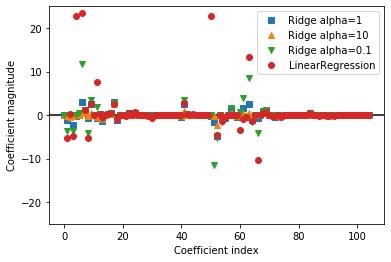

In [41]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lir.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

alpha越小约束越小，系数范围越大，alpha越大约束越大，系数范围越小。另一个方法可以理解正则化影响，就是固定alpha值，但改变训练数据量。随着模型可用的数据越来越多，两个模型性能都在上升，线性回归的性能追上了岭回归。如果有足够多的训练数据，正则化变得不那么重要，岭回归和线性回归具有相同的性能。

# 1.2.3lasso

lasso也是约束系数使其接近于0，但用到的方法不同叫L1正则化，使用lasso时某些系数刚好为0，说明某些特征被模型完全忽略。

In [50]:
from sklearn.datasets import load_boston
boston=load_boston()
x=boston.data
y=boston.target
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=9)

In [51]:
from sklearn.linear_model import Lasso
lasso=Lasso().fit(x_train,y_train)
print("train score："+str(lasso.score(x_train,y_train)))
print("test score:"+str(lasso.score(x_test,y_test)))
print("number of features used:"+str(np.sum(lasso.coef_!=0)))

train score：0.874824948290337
test score:0.8784471119232885
number of features used:55


In [54]:
lasso0001=Lasso(alpha=0.0001).fit(x_train,y_train)
print("train score："+str(lasso0001.score(x_train,y_train)))
print("test score:"+str(lasso0001.score(x_test,y_test)))
print("number of features used:"+str(np.sum(lasso.coef_!=0)))

train score：0.9158831931234437
test score:0.8173616169670967
number of features used:104


为了降低欠拟合，可以减小alpha 同时增加max_iter,alpha值变小我们可以拟合一个更复杂的模型，如果把alpha设置的太小，就会消除正则化的效果，出现过拟合，得到与linearregression类似的结果。

两个模型首选ridge 回归 ，如果特征多，只有几个是重要特征则选择lasso，如果想要一个更容易理解的模型lasso可以给出答案

# 1.2.4用于分类的线性模型（LogisticRegression&LinearSVC）

决策边界是输入的线性函数，二元线性分类器是利用直线，平面或超平面来分开两个类别的分类器

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#lr = LogisticRegression(C=100,penalty='l1')
lr=LogisticRegression()
lr.fit(x_train,y_train)
#y_pred_train=lr.predict(x_train)
#y_pred=lr.predict(x_test)
print("train score:" +str(lr.score(x_train,y_train)))
print("test score:" +str(lr.score(x_test,y_test)))
#运用逻辑回归进行分类
#默认都使用L2正则化，就和ridge回归一样，决定正则化强度的参数是C，C越大正则化越弱，训练集拟合效果越好，
#C越小正则化越强，模型更强调使系数向量接近零

train score:0.960093896713615
test score:0.951048951048951


In [58]:
#尝试增大c
lr100=LogisticRegression(C=100)
lr100.fit(x_train,y_train)
print("train score:" +str(lr100.score(x_train,y_train)))
print("test score:" +str(lr100.score(x_test,y_test)))

train score:0.9694835680751174
test score:0.951048951048951


In [59]:
#尝试减小c
lr001=LogisticRegression(C=0.01)
lr001.fit(x_train,y_train)
print("train score:" +str(lr001.score(x_train,y_train)))
print("test score:" +str(lr001.score(x_test,y_test)))
#已经向欠拟合方向移动

train score:0.9295774647887324
test score:0.951048951048951


由于logisticregression默认应用l2正则化与ridge相同，系数趋向零但永远不会等于零。如果想要一个解释性更强的模型，使用l1正则化可能更好，因为它约束模型只使用少数几个特征。

二分类的线性模型和回归的线性模型有许多相似之处，主要差别在于penalty参数，这个参数会影响正则化，也会影响模型是使用所有特征还是特征的一个子集。

许多线性分类模型只适用于二分类问题，不能轻易推广到多分类问题。将二分类推广到多分类的常见方法是“一对其余”。每个类别都学习一个二分类模型，将这个类别与所有其他类别尽量分开，这样就生成了与类别个数一样多的二分类模型。在测试点上运行所有二类分类器来进行预测。分数最高的分类器胜出，将这个类别标签返回作为预测结果。

# 1.3朴素贝叶斯分类器

朴素贝叶斯分类器与线性模型非常相似的一种分类器，但它的训练速度往往更快，但它的泛化能力要比线性分类器稍差。

GaussianNB可应用于任意连续数据，BernoulliNB假定输入数据为二分类数据，MultinomialNB假定输入数据为计数数据。后两者主要用于文本分类。

In [3]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_train,y_train)
# y_pred=GNB.predict(x_test)
# metrics.accuracy_score(y_test,y_pred)
print("train score:" +str(GNB.score(x_train,y_train)))
print("test score:" +str(GNB.score(x_test,y_test)))
#BernoulliNB和MultinomialNB主要用于文本数据分类

train score:0.9849624060150376
test score:1.0


# 1.4决策树

决策树本质上从一层层的if/else问题中进行学习，并得出结论
防止过拟合两种策略：预剪枝(及早停止树的生长)，后剪枝（先构造树，随后删除或折叠信息量很少的结点）。scikit-learn中只实现预剪枝
关键参数max_depth，降低训练集精度，提高测试集精度.决策树泛化性能较差

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)#固定树的random_state解决平局问题
tree.fit(x_train,y_train)
print("train score:" +str(tree.score(x_train,y_train)))
print("test score:" +str(tree.score(x_test,y_test)))

train score:1.0
test score:0.951048951048951


In [8]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
scores_train=[]
scores_test=[]
for k in np.arange(1,11):    
    tree=DecisionTreeClassifier(random_state=0,max_depth=k)
    tree.fit(x_train,y_train)
    scores_test.append(tree.score(x_test,y_test))
    scores_train.append(tree.score(x_train,y_train))
print(scores_train)
print(scores_test)
#利用决策树进行分类,关键参数max_depth

[0.9272300469483568, 0.960093896713615, 0.971830985915493, 0.9906103286384976, 0.9953051643192489, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9090909090909091, 0.9440559440559441, 0.9440559440559441, 0.951048951048951, 0.972027972027972, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951]


In [12]:
tree.feature_importances_
#特征重要性,它都是一个介于0和1之间的数字，0表示根本没用到，1表示完美预测目标值，特征重要性求和为1

array([0.        , 0.06185887, 0.        , 0.        , 0.        ,
       0.00738913, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00332322, 0.        ,
       0.        , 0.        , 0.        , 0.00931787, 0.        ,
       0.71162497, 0.06810204, 0.        , 0.        , 0.        ,
       0.02107272, 0.01063452, 0.10667666, 0.        , 0.        ])

In [13]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

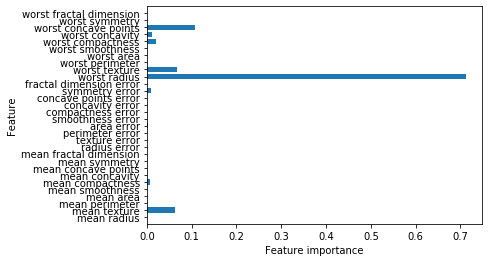

In [19]:
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = breast.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), breast.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

如果某个特征的feature_importance_很小，并不能说明这个特征没有提供任何信息，只能说明该特征没有被树选中，可能另一个特征也包含了同样的信息。基于树的回归模型不能外推，也不能再训练数据范围之外进行预测。

# 1.5决策树集成

集成式合并多个机器学习模型来构建更强大模型的方法，已证明有两种集成模型对大量分类和回归的数据集都是有效的
两者都以决策树为基础，分别是随机森林和梯度提升决策树

随机森林的主要作用是降低树对训练集的过拟合，构造一个随机森林模型，需要确定用于构造的树的个数（n_estimators），总是越大越好，在内存和时间允许的情况下尽量多
算法随机选择特征的一个子集，选择的特征个数由max_features控制，一般选择默认值

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RFC = RandomForestClassifier(n_estimators=1000)
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
y_train_pred=RFC.predict(x_train)
print("train score:"+str(RFC.score(x_train,y_train)))
print("test score:"+str(RFC.score(x_test,y_test)))
#利用随即森林进行分类，关键参数n_estimators越大越好降低过拟合
#随机森林的默认参数已经给出很好的结果

train score:1.0
test score:0.9790209790209791


In [36]:
RFC.feature_importances_

array([0.04100348, 0.01413723, 0.03973498, 0.04797103, 0.00787902,
       0.01402666, 0.03519794, 0.07660244, 0.00550121, 0.00436354,
       0.01378018, 0.00493371, 0.0182348 , 0.05871739, 0.00347675,
       0.00499628, 0.00486813, 0.00517505, 0.00382732, 0.0043913 ,
       0.11815839, 0.01608945, 0.11940851, 0.13434135, 0.01502886,
       0.01435909, 0.02885559, 0.12497559, 0.01132216, 0.0086426 ])

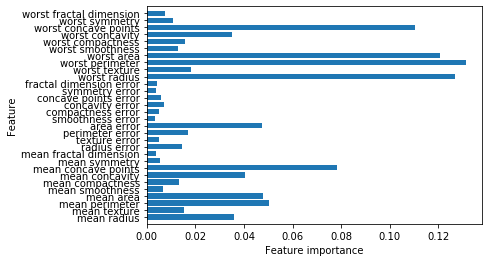

In [22]:
plot_feature_importances_cancer(RFC)

随机森林给出的特征重要性比单棵树给出的更为可靠

梯度提升树采用连续的方式构造树，每棵树都试图纠正前一棵树的错误
除了预剪枝与集成中树的数量之外，梯度提升的另一个重要参数是learning_rate,用于纠正每一棵树错误的强度，较高的学习率意味着每棵树都可以做出较强的修正，这样模型更为复杂，通过增大n_estimators向集成中添加更多树，也可以增强模型复杂度。

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
GBC=GradientBoostingClassifier(random_state=0)
GBC.fit(x_train,y_train)
y_pred=GBC.predict(x_test)
y_train_pred=GBC.predict(x_train)
print("train score:"+str(GBC.score(x_train,y_train)))
print("test score:"+str(GBC.score(x_test,y_test)))
#利用梯度提升机进行分类，关键参数n_estimator,max_depth,learning_rate
#训练精度100%可能存在过拟合，通过限制最大深度加强预剪枝

train score:1.0
test score:0.965034965034965


In [33]:
GBC=GradientBoostingClassifier(max_depth=1,random_state=0)
GBC.fit(x_train,y_train)
print("train score:"+str(GBC.score(x_train,y_train)))
print("test score:"+str(GBC.score(x_test,y_test)))

train score:0.9929577464788732
test score:0.965034965034965


In [34]:
GBC=GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=0.01,random_state=0)
GBC.fit(x_train,y_train)
print("train score:"+str(GBC.score(x_train,y_train)))
print("test score:"+str(GBC.score(x_test,y_test)))

train score:0.9812206572769953
test score:0.958041958041958


In [35]:
GBC.feature_importances_
#梯度提升树的特征重要性与随机森林的特征重要性有些类似，不过梯度提升树完全忽略了某些特征

array([0.00000000e+00, 3.63598222e-02, 0.00000000e+00, 0.00000000e+00,
       7.80018621e-04, 6.59000688e-04, 1.11948453e-03, 1.21404518e-02,
       1.72125838e-03, 2.46615971e-04, 3.27383505e-03, 0.00000000e+00,
       0.00000000e+00, 1.55855802e-03, 9.68222402e-05, 2.34060699e-03,
       1.73463214e-03, 2.01524403e-03, 0.00000000e+00, 2.27181884e-03,
       6.85009004e-01, 4.29250257e-02, 8.08365068e-02, 1.14005174e-03,
       6.90039211e-03, 0.00000000e+00, 7.68425073e-03, 1.00255730e-01,
       7.04406451e-03, 1.88680563e-03])

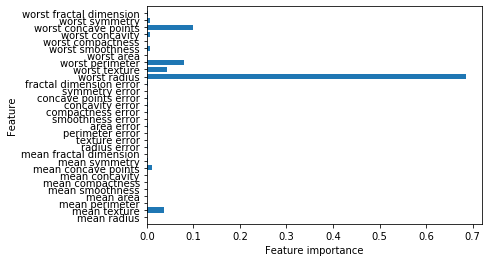

In [36]:
plot_feature_importances_cancer(GBC)

# 1.6核支持向量机

核支持向量机（添加更多的非线性特征，对输入特征进行扩展），它的原理是直接计算扩展特征表示中数据点之间的距离（内积），而不用实际对扩展进行计算。将数据映射到高维空间中主要使用径向基函数也称高斯核，
考虑所有阶数所有可能的多项式，阶数越高特征重要性越小。
SVM关键参数gamma控制高斯核的宽度，c是正则化参数限制每个点的重要性
为SVM预处理数据

gamma较小，高斯核半径越大，许多点都被看作比较靠近，决策边界变化慢，生成的是复杂度较低的模型

In [50]:
from sklearn.svm import SVC
from sklearn import metrics
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
y_train_pred=svm.predict(x_train)
print("train score:"+str(svm.score(x_train,y_train)))
print("test score:"+str(svm.score(x_test,y_test)))

train score:1.0
test score:0.6293706293706294


模型存在相当严重过拟合，模型对参数设定和数据的缩放非常敏感，要求所有的特征有相似的变化范围

In [51]:
#为SVM预处理数据,对所有特征进行缩放到0和1之间
min_on_train=x_train.min(axis=0)
range_on_train=(x_train-min_on_train).max(axis=0)
x_train_scaled=(x_train-min_on_train)/range_on_train
#训练集数据进行缩放
min_on_test=x_test.min(axis=0)
range_on_test=(x_test-min_on_test).max(axis=0)
x_test_scaled=(x_test-min_on_test)/range_on_test
#测试集数据进行缩放
svm.fit(x_train_scaled,y_train)
y_pred=svm.predict(x_test_scaled)
y_train_pred=svm.predict(x_train_scaled)
print("train score:"+str(svm.score(x_train_scaled,y_train)))
print("test score:"+str(svm.score(x_test_scaled,y_test)))

train score:0.9507042253521126
test score:0.965034965034965


In [76]:
from sklearn.preprocessing import MinMaxScaler
x_train_scaled1=MinMaxScaler().fit_transform(x_train)
x_test_scaled1=MinMaxScaler().fit_transform(x_test)
svm.fit(x_train_scaled1,y_train)
print("train score:"+str(svm.score(x_train_scaled1,y_train)))
print("test score:"+str(svm.score(x_test_scaled1,y_test)))

train score:0.9812206572769953
test score:0.958041958041958


In [78]:
#尝试增大c和gamma来拟合更复杂模型
svm=SVC(kernel='rbf',C=10,gamma=0.1)
svm.fit(x_train_scaled1,y_train)
# y_pred=svm.predict(x_test_scaled)
# y_train_pred=svm.predict(x_train_scaled)
print("train score:"+str(svm.score(x_train_scaled1,y_train)))
print("test score:"+str(svm.score(x_test_scaled1,y_test)))

train score:0.9812206572769953
test score:0.958041958041958


# 1.7神经网络（深度学习）

在计算完每个隐单元的加权求和之后，对结果再应用一个非线性函数-通常是校正非线性或正切双曲线

控制神经网络复杂度的方法有很多种：隐层个数，每个隐层中的单元个数，正则化
如何学习模型或用来学习参数的算法，这一点由solver参数设定，包含adam,lbfgs,sgd,使用MLP时建议使用前两种

如果想得到更加平滑的决策边界，可以添加更多的隐单元，添加第二个隐层，或者使用tanh非线性，调节l2惩罚参数alpha

In [82]:
#神经网络（多层感知机）Multilayer perceptron，也被称为前馈神经网络
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)
y_train_pred=mlp.predict(x_train)
print("train score:"+str(mlp.score(x_train,y_train)))
print("test score:"+str(mlp.score(x_test,y_test)))

train score:0.9413145539906104
test score:0.9370629370629371


In [83]:
#对数据进行缩放，均值为0方差为1
mean_on_train=x_train.mean(axis=0)
std_on_train=x_train.std(axis=0)
x_train_scaled=(x_train-mean_on_train)/std_on_train
#训练集数据缩放
x_test_scaled=(x_test-mean_on_train)/std_on_train
#测试集数据缩放
mlp=MLPClassifier(random_state=0,max_iter=400,alpha=0.1,hidden_layer_sizes=[10,100])
#警告超过最大迭代次数200，调整max_iter
#调整alpha增强泛化性能
mlp.fit(x_train_scaled,y_train)
y_pred=mlp.predict(x_test_scaled)
y_train_pred=mlp.predict(x_train_scaled)
print("train score:"+str(mlp.score(x_train_scaled,y_train)))
print("test score:"+str(mlp.score(x_test_scaled,y_test)))

train score:0.9976525821596244
test score:0.972027972027972


# 实例应用：根据M2，GDP，CPI预测不良贷款率

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
data=pd.read_excel('icaap data raw.xls',sheet_name='Sheet2')
for i in np.arange(0,136):
    if i%3==0:
        pass
    elif i%3==1:
        data.iloc[i,2]=data.iloc[i-1,2]+(data.iloc[i+2,2]-data.iloc[i-1,2])/3
        data.iloc[i,4]=data.iloc[i-1,4]+(data.iloc[i+2,4]-data.iloc[i-1,4])/3
    else:
        data.iloc[i,2]=data.iloc[i-2,2]+(data.iloc[i+1,2]-data.iloc[i-2,2])/3*2
        data.iloc[i,4]=data.iloc[i-2,4]+(data.iloc[i+1,4]-data.iloc[i-2,4])/3*2

In [2]:
x=data.iloc[:,1:4]
y=data.iloc[:,4]

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor(n_estimators=1000,max_depth=4,learning_rate=0.1)
GBR.fit(x_train,y_train)
print("train score:"+str(GBR.score(x_train,y_train)))
print("test score:"+str(GBR.score(x_test,y_test)))
#利用梯度提升机进行回归，关键参数n_estimator,max_depth,learning_rate

train score:0.9819752282736258
test score:0.9519707994649148
